# CIFAR-10 Dataset

## 1.LeNet-5 Architecture

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3571 - loss: 1.7811 - val_accuracy: 0.4767 - val_loss: 1.4626
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5113 - loss: 1.3838 - val_accuracy: 0.5143 - val_loss: 1.3628
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5472 - loss: 1.2744 - val_accuracy: 0.5555 - val_loss: 1.2566
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5811 - loss: 1.1923 - val_accuracy: 0.5760 - val_loss: 1.2057
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6027 - loss: 1.1237 - val_accuracy: 0.5708 - val_loss: 1.2028
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6220 - loss: 1.0737 - val_accuracy: 0.5947 - val_loss: 1.1508
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6398 - loss: 1.0244 - val_accuracy: 0.6085 - val_loss: 1.1246
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6568 - loss: 0.9805 - val_ac

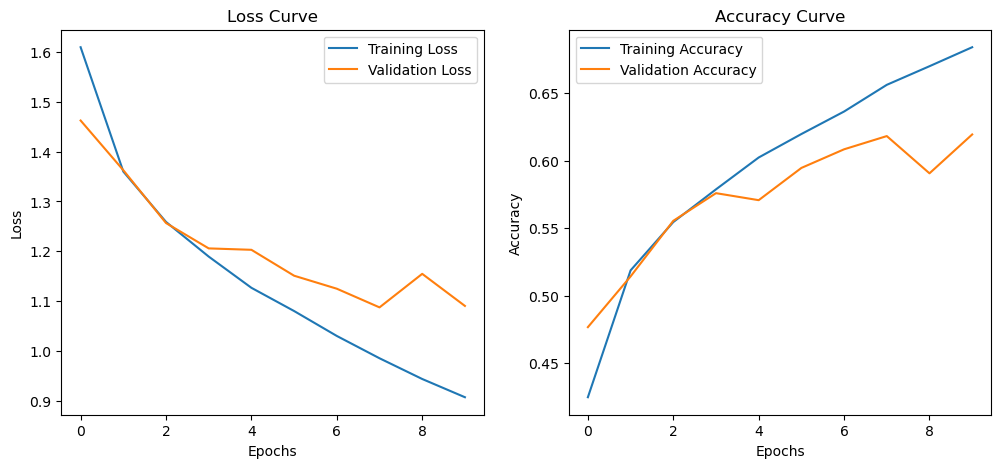

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define LeNet-5 architecture for CIFAR-10
def LeNet5():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 3), padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(16, kernel_size=(5, 5), activation='tanh', padding="valid"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the LeNet-5 model
model = LeNet5()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


## 2.Alexnet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1276s 4s/step - accuracy: 0.3088 - loss: 3.4816 - val_accuracy: 0.1430 - val_loss: 2.7422
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1262s 4s/step - accuracy: 0.5170 - loss: 1.3649 - val_accuracy: 0.5106 - val_loss: 1.3987
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1017s 3s/step - accuracy: 0.6094 - loss: 1.1034 - val_accuracy: 0.5855 - val_loss: 1.1944
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 805s 3s/step - accuracy: 0.6821 - loss: 0.9344 - val_accuracy: 0.6379 - val_loss: 1.0678
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 851s 3s/step - accuracy: 0.7314 - loss: 0.8058 - val_accuracy: 0.7076 - val_loss: 0.8529
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 796s 3s/step - accuracy: 0.7682 - loss: 0.6780 - val_accuracy: 0.6812 - val_loss: 0.9484
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 964s 3s/step - accuracy: 0.8037 - loss: 0.5880 - val_accuracy: 0.7398 - val_loss: 0.7995
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1320s 4s/step - accuracy: 0.8355 - loss: 0.5076 - val_

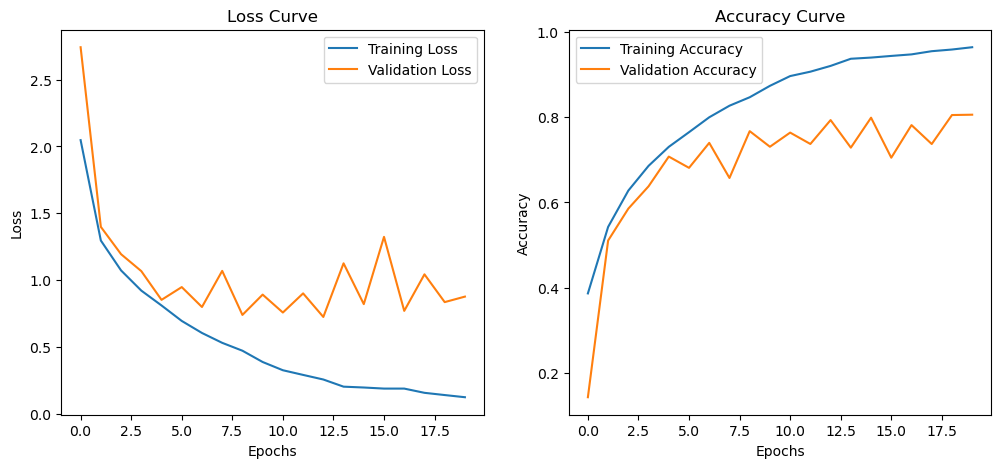

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define AlexNet architecture for CIFAR-10
def AlexNet():
    model = Sequential([
        Conv2D(96, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the AlexNet model
model = AlexNet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


## 3.GoogleNet Architecture

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input, concatenate
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define Inception module
def inception_module(x, filters):
    f1, f2_in, f2_out, f3_in, f3_out, f4_out = filters
    
    conv1x1_1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)
    
    conv1x1_2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv1x1_2)
    
    conv1x1_3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv1x1_3)
    
    maxpool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    conv1x1_4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(maxpool)
    
    output = concatenate([conv1x1_1, conv3x3, conv5x5, conv1x1_4], axis=-1)
    return output

# Define GoogLeNet model
def GoogLeNet():
    input_layer = Input(shape=(32, 32, 3))
    
    x = Conv2D(64, (7,7), padding='same', activation='relu', strides=(1,1))(input_layer)
    x = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    
    x = Conv2D(64, (1,1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    
    x = inception_module(x, [192, 96, 208, 16, 48, 64])
    x = inception_module(x, [160, 112, 224, 24, 64, 64])
    x = inception_module(x, [128, 128, 256, 24, 64, 64])
    x = inception_module(x, [112, 144, 288, 32, 64, 64])
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = inception_module(x, [384, 192, 384, 48, 128, 128])
    
    x = AveragePooling2D((2,2), strides=(1,1), padding='valid')(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=x)
    return model

# Compile and train the GoogLeNet model
model = GoogLeNet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


Epoch 1/10
 42/313 ━━━━━━━━━━━━━━━━━━━━ 8:00:50 106s/step - accuracy: 0.1101 - loss: 2.7849

## 4.VGGNet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1146s 4s/step - accuracy: 0.1537 - loss: 2.1523 - val_accuracy: 0.2822 - val_loss: 1.8334
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1015s 3s/step - accuracy: 0.2893 - loss: 1.7629 - val_accuracy: 0.4223 - val_loss: 1.4806
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1004s 3s/step - accuracy: 0.4486 - loss: 1.4349 - val_accuracy: 0.4671 - val_loss: 1.4179
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1276s 4s/step - accuracy: 0.5393 - loss: 1.2499 - val_accuracy: 0.6091 - val_loss: 1.0904
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1612s 5s/step - accuracy: 0.6261 - loss: 1.0417 - val_accuracy: 0.6505 - val_loss: 0.9802
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1647s 5s/step - accuracy: 0.6799 - loss: 0.8984 - val_accuracy: 0.6784 - val_loss: 0.9196
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1604s 5s/step - accuracy: 0.7333 - loss: 0.7576 - val_accuracy: 0.7053 - val_loss: 0.8612
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1513s 5s/step - accuracy: 0.7717 - loss: 0.6433 - 

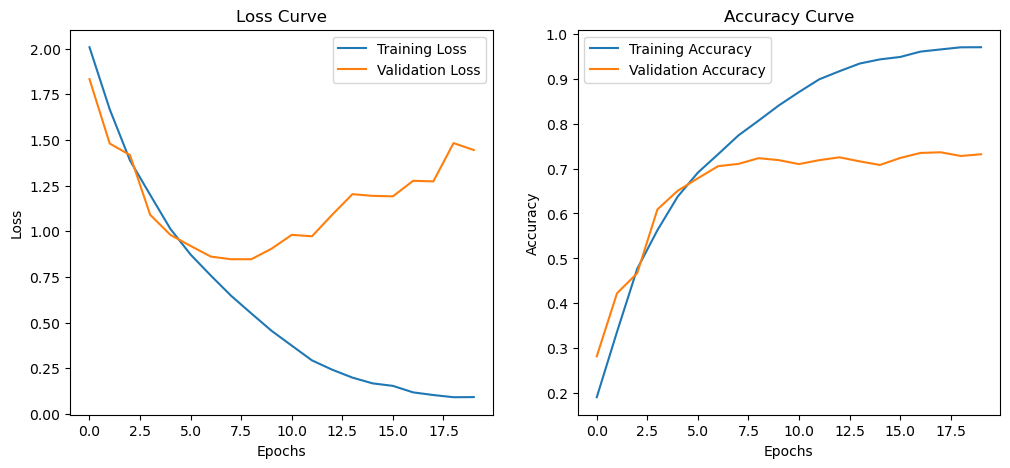

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define VGG-16 architecture for CIFAR-10
def VGG16():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the VGG-16 model
model = VGG16()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

## 5.ResNet Architecture

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.2525 - loss: 2.5925 - val_accuracy: 0.1500 - val_loss: 2.8092
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.4946 - loss: 1.3969 - val_accuracy: 0.3782 - val_loss: 1.7839
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.5760 - loss: 1.1928 - val_accuracy: 0.4715 - val_loss: 1.7392
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.6417 - loss: 1.0241 - val_accuracy: 0.4863 - val_loss: 1.5510
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.6744 - loss: 0.9355 - val_accuracy: 0.3866 - val_loss: 2.5948
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 663s 2s/step - accuracy: 0.7107 - loss: 0.8275 - val_accuracy: 0.5901 - val_loss: 1.2033
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1070s 3s/step - accuracy: 0.7278 - loss: 0.7798 - val_accuracy: 0.5695 - val_loss: 1.3504
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1130s 4s/step - accuracy: 0.7147 - loss: 0.8297 - val_ac

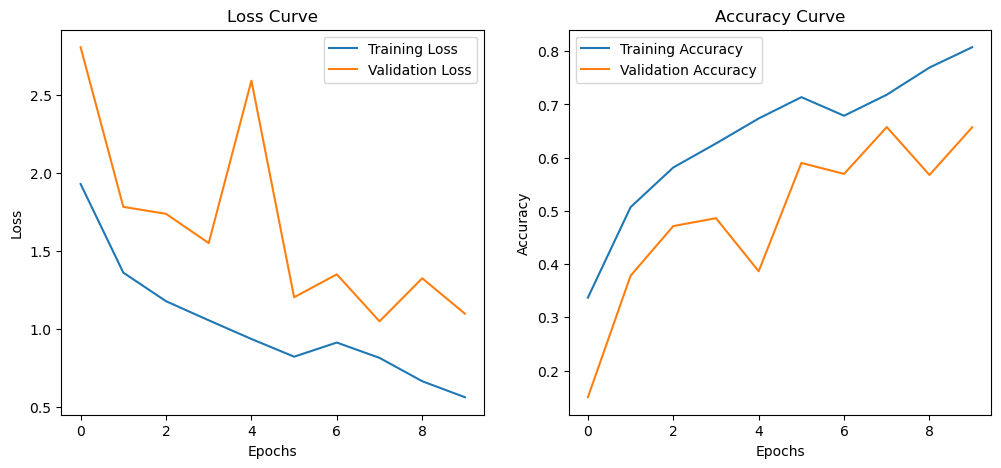

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define ResNet architecture for CIFAR-10
def ResNet50_model():
    base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Compile and train the ResNet model
model = ResNet50_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


## 6.Xception Architecture

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 172s 2us/step
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.6184 - loss: 1.1774 - val_accuracy: 0.6998 - val_loss: 0.8687
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.7470 - loss: 0.7393 - val_accuracy: 0.7246 - val_loss: 0.8001
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.7933 - loss: 0.5943 - val_accuracy: 0.7271 - val_loss: 0.8191
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.8373 - loss: 0.4687 - val_accuracy: 0.7325 - val_loss: 0.8226
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.8818 - loss: 0.3506 - val_accuracy: 0.7213 - val_loss: 0.9063
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.9228 - loss: 0.2464 - val_accuracy: 0.7188 - val_loss: 0.9964
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 464s 1s/step - accuracy: 0.9508 - loss: 0.1670 - val_accuracy: 0.7174 - val_loss: 1.0625
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 457s

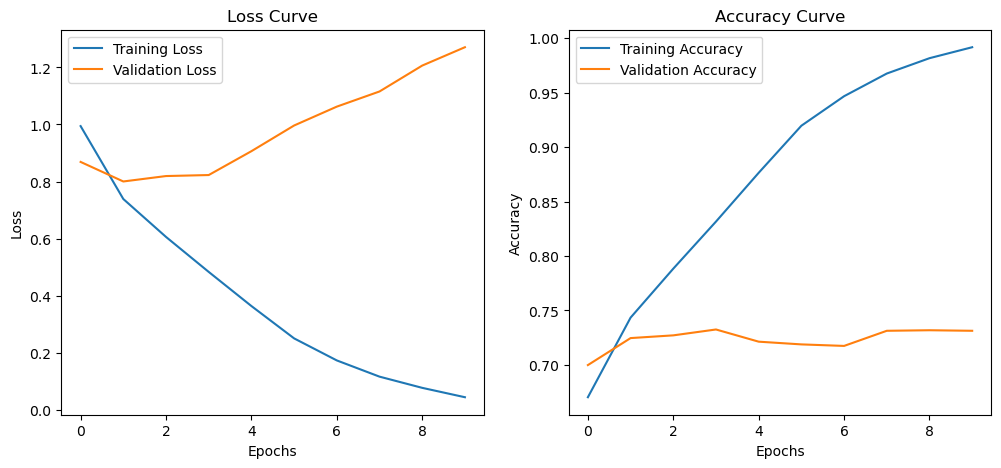

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

# Modify input size to (71,71,3) since Xception requires a minimum input size
train_images_resized = tf.image.resize(train_images, (71, 71))
test_images_resized = tf.image.resize(test_images, (71, 71))

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=out)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images_resized, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_resized, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images_resized)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

## 7.SENet Architecture

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 211s 648ms/step - accuracy: 0.2884 - loss: 1.9113 - val_accuracy: 0.5224 - val_loss: 1.3398
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 638ms/step - accuracy: 0.5406 - loss: 1.2857 - val_accuracy: 0.5928 - val_loss: 1.1612
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 639ms/step - accuracy: 0.6227 - loss: 1.0703 - val_accuracy: 0.6386 - val_loss: 1.0302
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 643ms/step - accuracy: 0.6828 - loss: 0.9034 - val_accuracy: 0.7006 - val_loss: 0.8713
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 641ms/step - accuracy: 0.7222 - loss: 0.8006 - val_accuracy: 0.7077 - val_loss: 0.8475
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 641ms/step - accuracy: 0.7554 - loss: 0.7021 - val_accuracy: 0.7252 - val_loss: 0.7972
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 180s 570ms/step - accuracy: 0.7825 - loss: 0.6191 - val_accuracy: 0.7344 - val_loss: 0.7933
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 366ms/step - accuracy: 0.8116 -

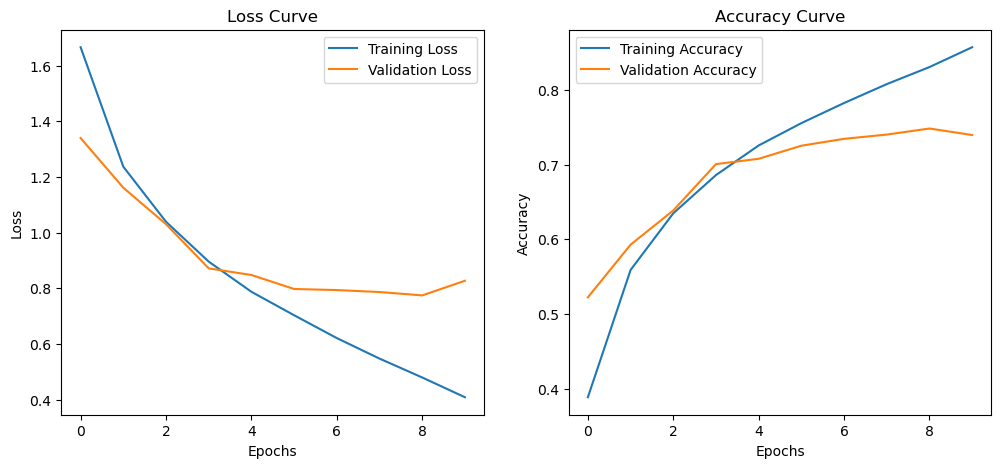

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Input, Reshape, Multiply, Activation
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images to range [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define Squeeze-and-Excitation (SE) block
def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# Define SENet architecture
def SENet():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = se_block(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = se_block(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = se_block(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(inputs, x)
    return model

# Compile and train the SENet model
model = SENet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()